In [1]:
import pandas as pd 
from rich import print
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
from statsmodels.stats.weightstats import ttest_ind


In [2]:
df = pd.read_csv("../data/reactiontimes.csv")
#df["year"] = [int(x.split("/")[5]) for x in df.url.values]
df["year"] =[int(x.split(" ")[-1]) for x in df.date.values]

df = df.drop(index=3865)
df["reaction_time_float"] = pd.to_numeric(df["Reaction Time"],errors="ignore")
df["Sex"] = df.sex
df = df[df.year>=1999]
df = df[df.reaction_time_float>=0]
df = df[df.reaction_time_float>0]
df.loc[df.Sex=="men","Sex"] = "Male"
df.loc[df.Sex=="women","Sex"] = "Female"

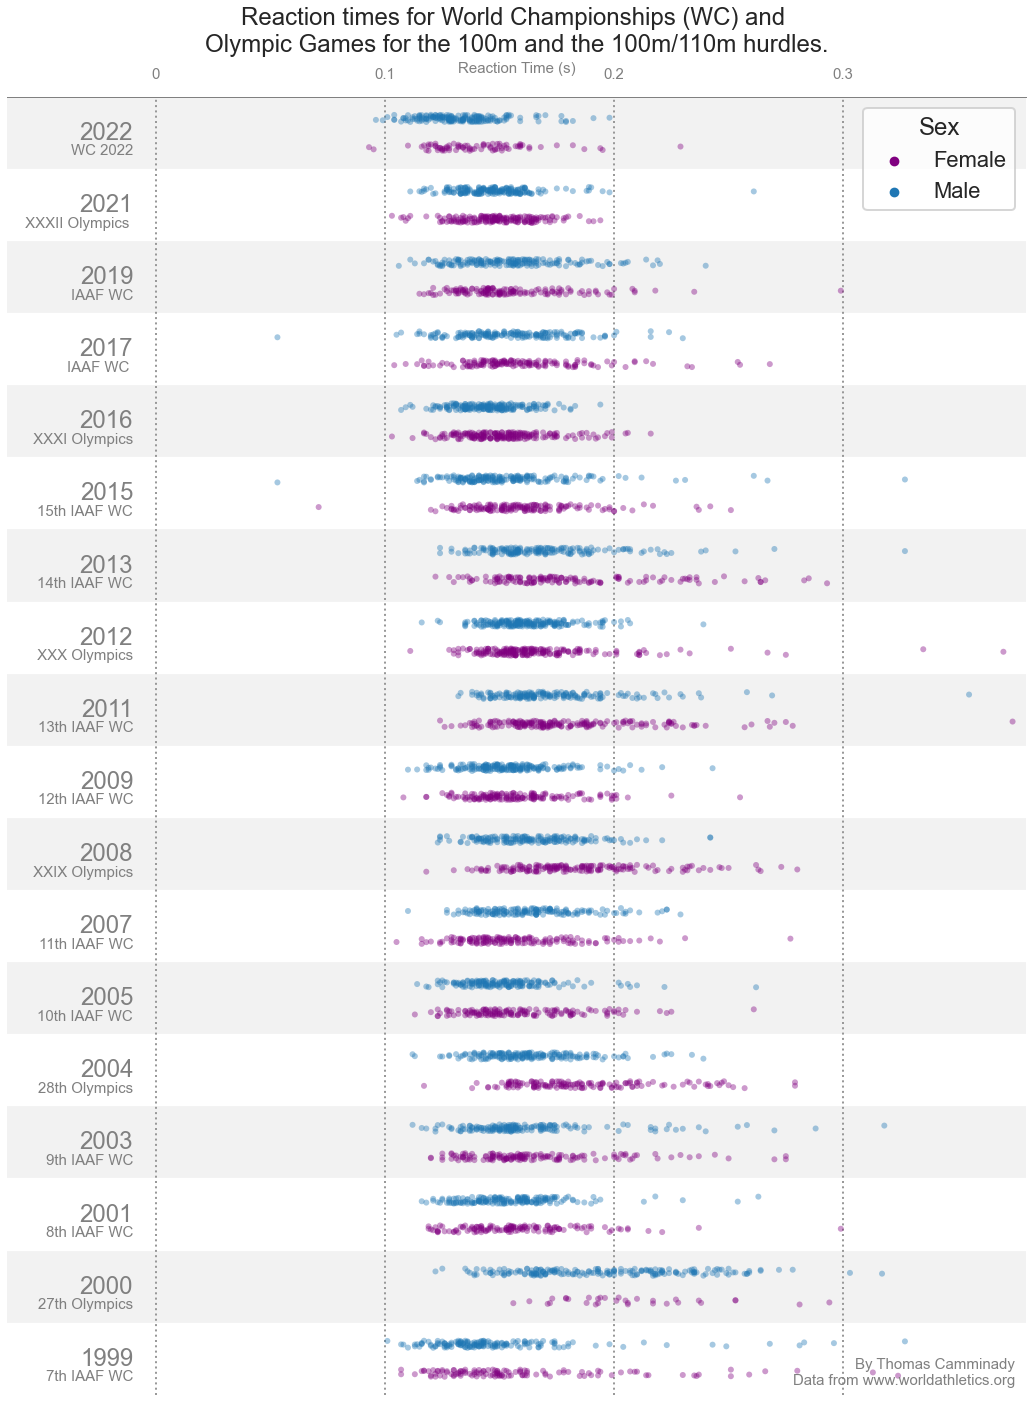

In [52]:
sns.set_context("poster")
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})
fig,ax = plt.subplots(figsize=(15,20))

# Plot the orbital period with horizontal boxes
#sns.boxplot(x="reaction_time_float", y="year", data=df,
#            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation



sns.stripplot(
    y="year", 
    x="reaction_time_float", 
    hue="Sex",
    data=df,
    size=6,  
    alpha=0.4,
    linewidth=0,
    dodge=True,
    palette=["purple",'tab:blue'],
    orient="h",
)
smallfontsize =15
ax.set_xlim(-0.065,0.38)
ax.set_xticks([0,0.1,0.2,0.3])
ax.set_xticklabels(["0","0.1","0.2","0.3"],fontsize=smallfontsize,color="grey")
#ax.axvline(0.1,c='black')
ax.xaxis.grid(True)
ax.set_xlabel("Reaction Time (s)",labelpad=-5,fontsize = smallfontsize,color="grey")

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
sns.despine(ax=ax, top=False, left=True,right=True,bottom=True)
ax.xaxis.label.set_color('grey')
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
import numpy as np
x = np.linspace(-1,1,4)


for i in range(0,17,2):
    ax.fill_between(x,i+.5, i+1.5,
                    facecolor='gray', alpha=0.1,zorder=-1)
for i,year in zip(range(18),np.unique(df.year.values)):
    ax.text(-0.01, i, str(year),va="center",ha="right",color="grey")
    games = np.unique(df[df.year==year].name)[0]
    ax.text(-0.01, i-0.25, games.replace("World Athletics Championships","WC").replace(", Oregon","").replace(", DOHA 2019","").replace("London 2017","").replace("(Athletics)","").replace("World Championships in Athletics","WC").replace("World Championships","WC").replace("The", "").replace("Olympic Games","Olympics"),
            va="center",ha="right",color="grey",fontsize=smallfontsize)
#ax.fill_between(x, 2010,2022)
ax.set_ylim(17.5,-0.5)
ax.invert_yaxis()

ax.xaxis.label.set_color('grey')        #setting up X-axis label color to yellow
ax.spines['top'].set_color('grey')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('grey')        # setting up Y-axis tick color to red
ax.spines["top"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("Reaction times for World Championships (WC) and \nOlympic Games for the 100m and the 100m/110m hurdles.",pad=10)
ax.text(0.375,-0.4,"By Thomas Camminady\nData from www.worldathletics.org",fontsize=smallfontsize,color="grey",ha="right",va="bottom")
plt.tight_layout()

plt.savefig("../results/reactiontimes.png",dpi=200)

#ax.set_ylabel("Year",labelpad=15)

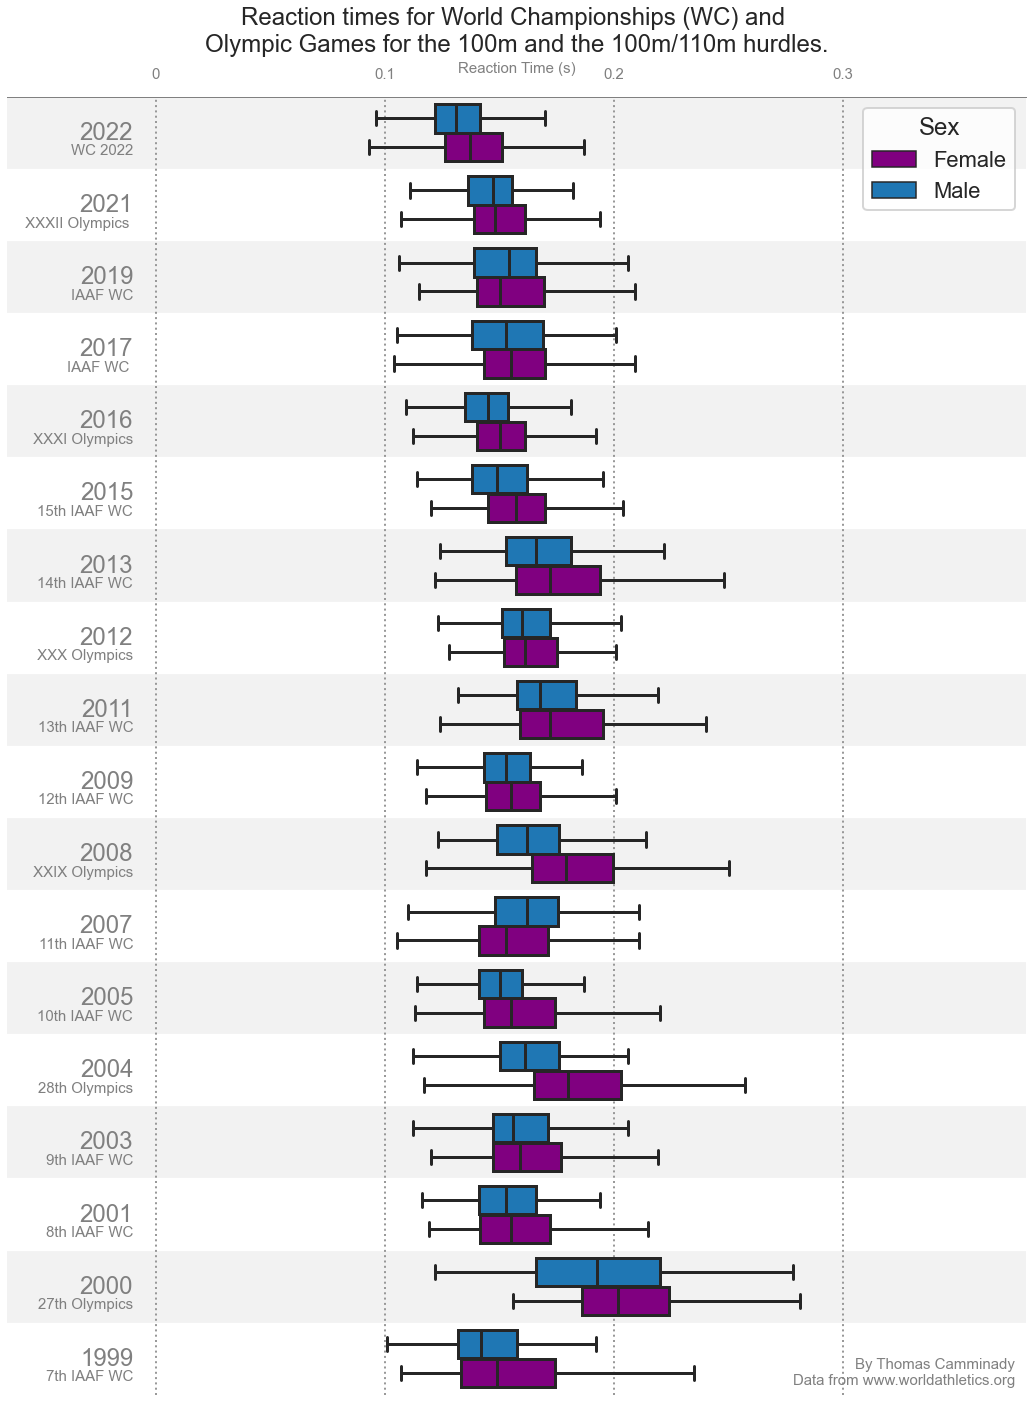

In [53]:
sns.set_context("poster")
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})
fig,ax = plt.subplots(figsize=(15,20))

# Plot the orbital period with horizontal boxes
#sns.boxplot(x="reaction_time_float", y="year", data=df,
#            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation


sns.boxplot(
    y="year", 
    x="reaction_time_float", 
    hue="Sex",
    data=df,
    dodge=True,
    saturation = 1,
    palette=["purple",'tab:blue'],
    orient="h",
    fliersize = 0
)
smallfontsize =15
ax.set_xlim(-0.065,0.38)
ax.set_xticks([0,0.1,0.2,0.3])
ax.set_xticklabels(["0","0.1","0.2","0.3"],fontsize=smallfontsize,color="grey")
#ax.axvline(0.1,c='black')
ax.xaxis.grid(True)
ax.set_xlabel("Reaction Time (s)",labelpad=-5,fontsize = smallfontsize,color="grey")

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
sns.despine(ax=ax, top=False, left=True,right=True,bottom=True)
ax.xaxis.label.set_color('grey')
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
import numpy as np
x = np.linspace(-1,1,4)


for i in range(0,17,2):
    ax.fill_between(x,i+.5, i+1.5,
                    facecolor='gray', alpha=0.1,zorder=-1)
for i,year in zip(range(18),np.unique(df.year.values)):
    ax.text(-0.01, i, str(year),va="center",ha="right",color="grey")
    games = np.unique(df[df.year==year].name)[0]
    ax.text(-0.01, i-0.25, games.replace("World Athletics Championships","WC").replace(", Oregon","").replace(", DOHA 2019","").replace("London 2017","").replace("(Athletics)","").replace("World Championships in Athletics","WC").replace("World Championships","WC").replace("The", "").replace("Olympic Games","Olympics"),
            va="center",ha="right",color="grey",fontsize=smallfontsize)
#ax.fill_between(x, 2010,2022)
ax.set_ylim(17.5,-0.5)
ax.invert_yaxis()

ax.xaxis.label.set_color('grey')        #setting up X-axis label color to yellow
ax.spines['top'].set_color('grey')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('grey')        # setting up Y-axis tick color to red
ax.spines["top"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("Reaction times for World Championships (WC) and \nOlympic Games for the 100m and the 100m/110m hurdles.",pad=10)
ax.text(0.375,-0.4,"By Thomas Camminady\nData from www.worldathletics.org",fontsize=smallfontsize,color="grey",ha="right",va="bottom")
plt.tight_layout()

plt.savefig("../results/reactiontimesbox.png",dpi=200)

#ax.set_ylabel("Year",labelpad=15)

In [4]:
df["Venue"] = "Not Eugene"
df.loc[df.year == 2022, "Venue"] = "Eugene"
df["color"] = "purple"
df.loc[df.Sex=="male","color"] = "green"

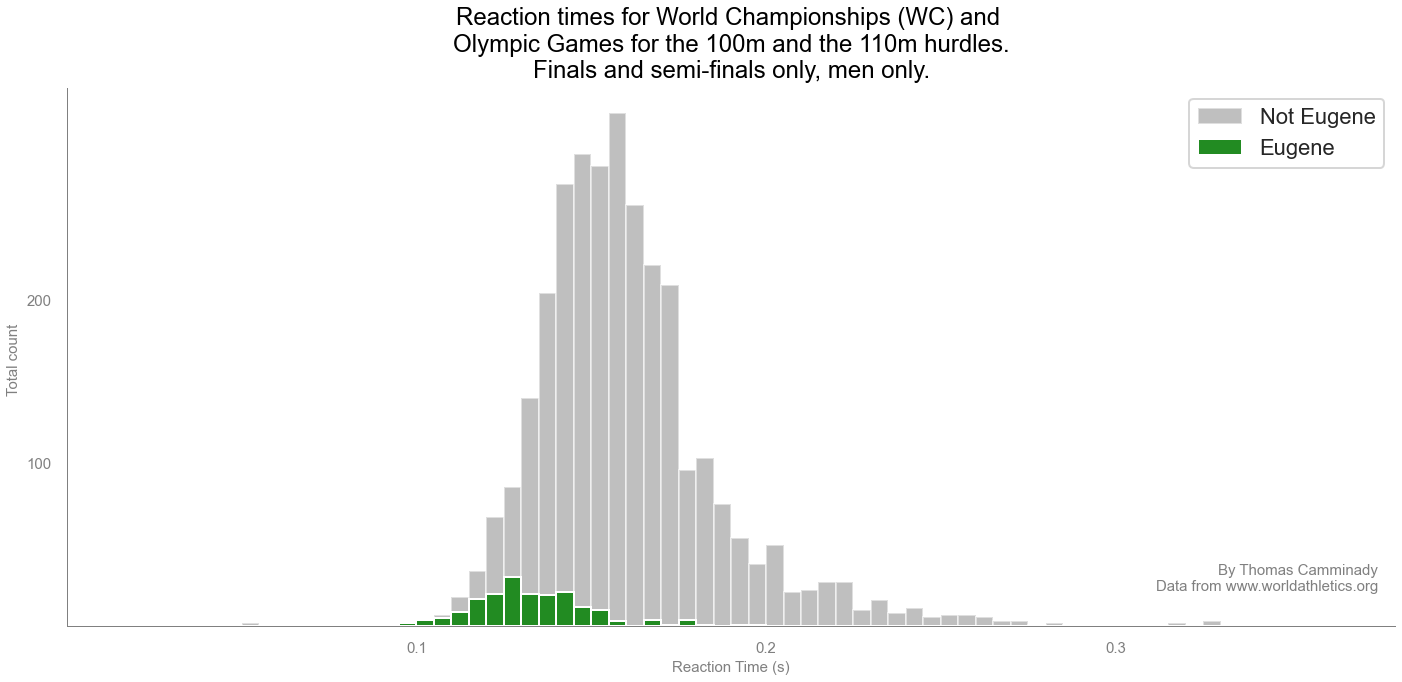

In [55]:
sns.set_context("poster")
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})
fig,ax= plt.subplots(1,1,figsize=(20,10))

subdf = df[(df["Venue"]=="Not Eugene") &(df["Sex"]=="Male")]
ax.hist(subdf.reaction_time_float.values,
        color ="grey",
        bins=np.arange(0,0.4,0.005),
        #weights=np.zeros_like(subdf.reaction_time_float.values) + 1. / subdf.reaction_time_float.values.size,
        alpha=0.5,
        #density = True,
        edgecolor = 'w',
        
        );

subdf = df[(df["Venue"]=="Eugene") &(df["Sex"]=="Male")]
ax.hist(subdf.reaction_time_float.values,
        color ="forestgreen",
        bins=np.arange(0,0.4,0.005),
        #weights=np.zeros_like(subdf.reaction_time_float.values) + 1. / subdf.reaction_time_float.values.size,
        alpha=1,
        edgecolor = 'w',
        #density=True
        );

plt.legend(["Not Eugene","Eugene"])
ax.xaxis.label.set_color('grey')        #setting up X-axis label color to yellow
ax.spines['bottom'].set_color('grey')        # setting up Y-axis tick color to red
ax.spines['left'].set_color('grey')        # setting up Y-axis tick color to red
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
sns.despine(ax=ax, top=True, left=False,right=True,bottom=False,trim = False)
ax.set_xlabel("Reaction Time (s)",labelpad=5,fontsize = smallfontsize,color="grey")
ax.set_ylabel("Total count ",labelpad=5,fontsize = smallfontsize,color="grey")
ax.set_xlim(0,0.38)
ax.set_xticks([0.1,0.2,0.3])
#ax.grid()
ax.set_xticklabels(["0.1","0.2","0.3"],fontsize=smallfontsize,color="grey")
ax.set_yticks([100,200])
ax.set_yticklabels(["100","200",],fontsize=smallfontsize,color="grey")
ax.set_title("Reaction times for World Championships (WC) and \nOlympic Games for the 100m and the 110m hurdles.\nFinals and semi-finals only, men only.",pad=10,
             color = "black")
ax.text(0.375,20,"By Thomas Camminady\nData from www.worldathletics.org",fontsize=smallfontsize,color="grey",ha="right",va="bottom")
plt.tight_layout()
plt.savefig("../results/histogram.png",dpi=200)

In [6]:
df[((df["round"] == "final") |
   (df["round"] == "semi-final"))
   & (df["Sex"]=="Male")].groupby(["Sex","name"])["reaction_time_float"].agg(["count","mean","std","min"]).sort_values("mean", ascending=True)

count      mean       std  \
Sex  name                                                                       
Male World Athletics Championships, Oregon 2022        62  0.129500  0.013476   
     7th IAAF World Championships in Athletics         44  0.138432  0.015111   
     The XXXI Olympic Games                            63  0.144635  0.016202   
     8th IAAF World Championships                      55  0.144909  0.012782   
     The XXXII Olympic Games (Athletics)               62  0.146855  0.015625   
     15th IAAF World Championships                     66  0.148212  0.018155   
     12th IAAF World Championships in Athletics        55  0.148273  0.017067   
     10th IAAF World Championships in Athletics        56  0.151071  0.017617   
     IAAF World Championships London 2017              64  0.151984  0.022828   
     IAAF World Athletics Championships, DOHA 2019     65  0.155077  0.025911   
     The XXIX Olympic Games                            48  0.158250  0.018936   
     11th IAAF World Championships in Athletics        56  0.158982  0.016956   
     The XXX Olympic Games                             64  0.160141  0.015025   
     28th Olympic Games                                47  0.161745  0.017927   
     9th IAAF World Championships in Athletics         57  0.164789  0.031749   
     13th IAAF World Championships in Athletics        54  0.167074  0.017621   
     14th IAAF World Championships                     54  0.168963  0.044261   
     27th Olympic Games                                48  0.180354  0.030566   

                                                      min  
Sex  name                                                  
Male World Athletics Championships, Oregon 2022     0.099  
     7th IAAF World Championships in Athletics      0.101  
     The XXXI Olympic Games                         0.109  
     8th IAAF World Championships                   0.116  
     The XXXII Olympic Games (Athletics)            0.116  
     15th IAAF World Championships                  0.117  
     12th IAAF World Championships in Athletics     0.110  
     10th IAAF World Championships in Athletics     0.119  
     IAAF World Championships London 2017           0.115  
     IAAF World Athletics Championships, DOHA 2019  0.113  
     The XXIX Olympic Games                         0.124  
     11th IAAF World Championships in Athletics     0.127  
     The XXX Olympic Games                          0.135  
     28th Olympic Games                             0.124  
     9th IAAF World Championships in Athletics      0.112  
     13th IAAF World Championships in Athletics     0.138  
     14th IAAF World Championships                  0.132  
     27th Olympic Games                             0.125

In [7]:
eugene_times = df.loc[df["Venue"] == "Eugene","reaction_time_float"].values
noneugene_times = df.loc[df["Venue"] == "Not Eugene","reaction_time_float"].values

In [8]:
overview = {}
subdf = df[((df["round"] == "final") |
   (df["round"] == "semi-final"))
   & (df["Sex"]=="Male")]
for year in np.unique(subdf.year.values):
    subdf["Venue2"] = "Not X"
    subdf.loc[df.year == year, "Venue2"] = "X"
    x_times = subdf.loc[subdf["Venue2"] == "X","reaction_time_float"].values
    nonx_times = subdf.loc[subdf["Venue2"] == "Not X","reaction_time_float"].values
    print(len(x_times),len(nonx_times))
#   print(ttest_ind(x_times,nonx_times))
    overview[year] = ttest_ind(x_times,nonx_times,usevar="unequal")[1]
    print(year,ks_2samp(x_times,nonx_times,mode="exact",alternative = "two-sided"))
print(overview)

/var/folders/0y/rspphn5n7g9c2sv371v7msr00000gn/T/ipykernel_36649/3980892977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf["Venue2"] = "Not X"


44 976

NameError: name 'ks_2samp' is not defined